ARIMA R² Score: -2.4659
ARIMA MSE: 2300.1893
ARIMA MAE: 40.4549


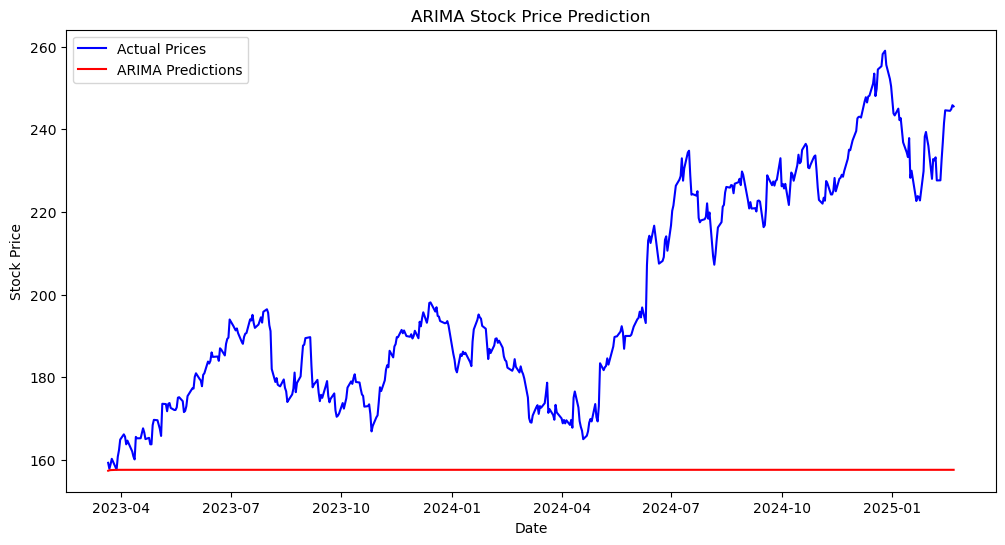

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("AAPL_final_merged.csv")

# Ensure dates are in datetime format and sort the dataset
df["Date_x"] = pd.to_datetime(df["Date_x"])
df = df.sort_values("Date_x")

# Use only the closing price for time-series forecasting
closing_prices = df["close_x"]

# Split data into train (80%) and test (20%) sets
train_size = int(len(closing_prices) * 0.8)
train, test = closing_prices[:train_size], closing_prices[train_size:]

# Train an ARIMA model (order=(p, d, q))
# p = autoregression terms, d = differencing, q = moving average terms
arima_order = (5, 1, 0)  # You can tune this for better results
model = ARIMA(train, order=arima_order)
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model
arima_r2 = r2_score(test, predictions)
arima_mse = mean_squared_error(test, predictions)
arima_mae = mean_absolute_error(test, predictions)

# Display results
print(f"ARIMA R² Score: {arima_r2:.4f}")
print(f"ARIMA MSE: {arima_mse:.4f}")
print(f"ARIMA MAE: {arima_mae:.4f}")

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(df["Date_x"][train_size:], test, label="Actual Prices", color="blue")
plt.plot(df["Date_x"][train_size:], predictions, label="ARIMA Predictions", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("ARIMA Stock Price Prediction")
plt.legend()
plt.show()
